<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download IMDB reviews dataset from Kaggle

https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [1]:
# install library
! pip install -q kaggle

In [2]:
# import files class to upload files to colab
from google.colab import files

In [3]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pkasnesis","key":"d202848b9a00e8f6959f9753b8abf697"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download imdb dataset and unzip to imdb folder
! kaggle datasets download 'lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'
! mkdir imdb
! unzip imdb-dataset-of-50k-movie-reviews.zip  -d imdb

 97% 25.0M/25.7M [00:00<00:00, 124MB/s] 
100% 25.7M/25.7M [00:00<00:00, 111MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: imdb/IMDB Dataset.csv   


# Read Data

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Import Dataset
df = pd.read_csv("imdb/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# Replacing text values to numerical (positive: 1, negative: 0)
df.replace({"positive":1,"negative":0},inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
# split dataset
x_train = df['review'].iloc[:25000]
x_test = df['review'].iloc[25000:]
y_train = df['sentiment'].iloc[:25000]
y_test = df['sentiment'].iloc[25000:]

# Preprocess text

In [10]:
import re
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
x_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [14]:
x_train.iloc[:10].apply(lambda x: nltk.word_tokenize(x))

0    [One, of, the, other, reviewers, has, mentione...
1    [A, wonderful, little, production, ., <, br, /...
2    [I, thought, this, was, a, wonderful, way, to,...
3    [Basically, there, 's, a, family, where, a, li...
4    [Petter, Mattei, 's, ``, Love, in, the, Time, ...
5    [Probably, my, all-time, favorite, movie, ,, a...
6    [I, sure, would, like, to, see, a, resurrectio...
7    [This, show, was, an, amazing, ,, fresh, &, in...
8    [Encouraged, by, the, positive, comments, abou...
9    [If, you, like, original, gut, wrenching, laug...
Name: review, dtype: object

In [15]:
def preprocess(text):
    text = re.sub(r'http\S+', 'HTTPURL', text)#<URL>
    text = re.sub(r'<br\s?\/>|<br>', "", text) #remove <br>
    text = nltk.word_tokenize(text.lower()) #lower case
    text = [w for w in text if not w in stop_words]
    text = (" ").join(text)
    text = re.sub(r"([.!?])", r" \1", text)
    text = re.sub(r"[^a-zA-Z.!?]+", r" ", text)
    text = re.sub(r"\s+", r" ", text).strip()
    return text

x_train = x_train.apply(preprocess)
x_test = x_test.apply(preprocess)

In [16]:
x_train.head()

0    one reviewers mentioned watching oz episode ll...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    basically s family little boy jake thinks s zo...
4    petter mattei s love time money visually stunn...
Name: review, dtype: object

In [18]:
word_to_counts = x_train.str.split(expand=True).stack().value_counts()
word_to_counts

.                  282086
s                   63539
movie               44176
film                39960
t                   33612
                    ...  
krush                   1
moussolini              1
.showing                1
parenthetically         1
underlays               1
Length: 79664, dtype: int64

In [19]:
most_freq_words = word_to_counts.index[:10000]

In [20]:
word_2_index = {"SOS":0, "EOS":1, "UNK":2, "PAD":3}
index_2_word = {0: "SOS", 1: "EOS", 2:"UNK", 3:"PAD"}
n_words = 4

In [21]:
def add_to_voc(text, word_2_index, index_2_word, most_freq_words, n_words):
  for word in text.split(' '):
    if word not in word_2_index:
      if word in most_freq_words:
        word_2_index[word] = n_words
        index_2_word[n_words] = word
        n_words += 1
      else:
        word_2_index[word] = word_2_index['UNK']
  return word_2_index, index_2_word, n_words

In [22]:
for i in x_train:
  word_2_index, index_2_word, n_words = add_to_voc(i, word_2_index, index_2_word, most_freq_words,n_words)

In [23]:
word_2_index

{'SOS': 0,
 'EOS': 1,
 'UNK': 2,
 'PAD': 3,
 'one': 4,
 'reviewers': 5,
 'mentioned': 6,
 'watching': 7,
 'oz': 8,
 'episode': 9,
 'll': 10,
 'hooked': 11,
 '.': 12,
 'right': 13,
 'exactly': 14,
 'happened': 15,
 'me': 16,
 '.the': 17,
 'first': 18,
 'thing': 19,
 'struck': 20,
 'brutality': 21,
 'unflinching': 2,
 'scenes': 22,
 'violence': 23,
 'set': 24,
 'word': 25,
 'go': 26,
 'trust': 27,
 'show': 28,
 'faint': 29,
 'hearted': 30,
 'timid': 2,
 'pulls': 31,
 'punches': 32,
 'regards': 33,
 'drugs': 34,
 'sex': 35,
 'hardcore': 36,
 'classic': 37,
 'use': 38,
 '.it': 39,
 'called': 40,
 'nickname': 2,
 'given': 41,
 'oswald': 2,
 'maximum': 42,
 'security': 43,
 'state': 44,
 'penitentary': 2,
 'focuses': 45,
 'mainly': 46,
 'emerald': 2,
 'city': 47,
 'experimental': 48,
 'section': 49,
 'prison': 50,
 'cells': 51,
 'glass': 52,
 'fronts': 2,
 'face': 53,
 'inwards': 2,
 'privacy': 2,
 'high': 54,
 'agenda': 55,
 'em': 56,
 'home': 57,
 'many': 58,
 'aryans': 2,
 'muslims': 59,


In [24]:
def sentence_to_int(text): 
  text = nltk.word_tokenize(text.lower())
  ints = [word_2_index['SOS']]
  for word in text:
    if word in word_2_index:
      ints.append(word_2_index[word])
    else:
      ints.append(word_2_index['UNK'])

  return ints

In [25]:
X_train = x_train.apply(sentence_to_int)
X_test = x_test.apply(sentence_to_int)

In [26]:
X_train

0        [0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
1        [0, 131, 132, 133, 12, 134, 135, 2, 136, 137, ...
2        [0, 194, 131, 195, 196, 137, 197, 198, 199, 20...
3        [0, 258, 168, 259, 132, 260, 261, 262, 168, 26...
4        [0, 2, 299, 168, 230, 137, 300, 301, 302, 278,...
                               ...                        
24995    [0, 267, 286, 2743, 2275, 3234, 12, 18, 508, 4...
24996    [0, 942, 4826, 2641, 2, 2912, 6530, 629, 1539,...
24997    [0, 7685, 2, 3794, 168, 40, 2, 2201, 285, 330,...
24998    [0, 2, 651, 2, 28, 166, 12, 58, 1002, 112, 364...
24999    [0, 278, 67, 499, 12, 1066, 279, 4993, 93, 124...
Name: review, Length: 25000, dtype: object

In [31]:
# set max sentence length to 200
def remove_and_pad(text):
  max_length = 199
  length = len(text)
  if length >= max_length:
    text = text[:max_length]
    text.append(word_2_index['EOS'])
  else:
    text.append(word_2_index['EOS'])
    diff = max_length-length
    for _ in range(diff):
      text.append(word_2_index['PAD'])


  return text

In [32]:
X_train = X_train.apply(remove_and_pad)
X_test = X_test.apply(remove_and_pad)

In [34]:
train = np.zeros((25000, 200))
for i, seq in enumerate(X_train):
  train[i,:] = seq

test = np.zeros((25000, 200))
for i, seq in enumerate(X_test):
  test[i,:] = seq

# Create embedding-based model
Keras makes it easy to use word [embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

In [35]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, Dropout

In [36]:
# Embeddings of 10000 words into 3 dimensions.
embedding_layer = tf.keras.layers.Embedding(10000, 3)
embed = embedding_layer(tf.constant([1,2,3,4,5]))
embed.numpy()

array([[ 0.04640773,  0.0003239 ,  0.03186974],
       [-0.0471614 , -0.02548758, -0.02328636],
       [-0.02645097,  0.03968341,  0.04903657],
       [ 0.01702798, -0.00027541,  0.04973097],
       [ 0.02942863,  0.02661182,  0.03408058]], dtype=float32)

In [42]:
emb = np.random.randn(10004,32)

In [43]:
emb.shape

(10004, 32)

In [44]:
token_i = np.zeros((1,10004))

In [46]:
token_i[:,5] = 1

In [50]:
token_i[:,:6]

array([[0., 0., 0., 0., 0., 1.]])

In [51]:
emb_i = np.dot(token_i,emb)

In [52]:
emb_i.shape

(1, 32)

In [37]:
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

inputs = keras.Input(shape=(None,), dtype="int32")
# TO DO 
# define embedding layer with shape (10004,32)
x = Embedding(10004, 32, name="embedding")(inputs)
x = GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 32)          320128    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321,217
Trainable params: 321,217
Non-trainable params: 0
_______________________________________________________

In [38]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train, y_train.to_numpy(), batch_size=512, epochs=10, validation_data=(test, y_test.to_numpy()))

Epoch 1/10
49/49 [==============================] - 3s 45ms/step - loss: 0.6874 - accuracy: 0.6008 - val_loss: 0.6757 - val_accuracy: 0.6621
Epoch 2/10
49/49 [==============================] - 1s 28ms/step - loss: 0.6450 - accuracy: 0.7636 - val_loss: 0.6044 - val_accuracy: 0.7986
Epoch 3/10
49/49 [==============================] - 1s 27ms/step - loss: 0.5433 - accuracy: 0.8231 - val_loss: 0.4930 - val_accuracy: 0.8358
Epoch 4/10
49/49 [==============================] - 2s 35ms/step - loss: 0.4288 - accuracy: 0.8601 - val_loss: 0.4018 - val_accuracy: 0.8547
Epoch 5/10
49/49 [==============================] - 2s 39ms/step - loss: 0.3448 - accuracy: 0.8864 - val_loss: 0.3467 - val_accuracy: 0.8732
Epoch 6/10
49/49 [==============================] - 2s 44ms/step - loss: 0.2930 - accuracy: 0.8992 - val_loss: 0.3182 - val_accuracy: 0.8787
Epoch 7/10
49/49 [==============================] - 2s 38ms/step - loss: 0.2584 - accuracy: 0.9094 - val_loss: 0.3010 - val_accuracy: 0.8833
Epoch 8/10
49

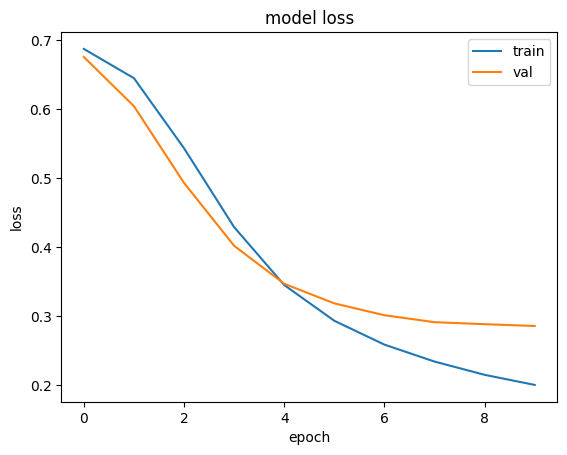

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

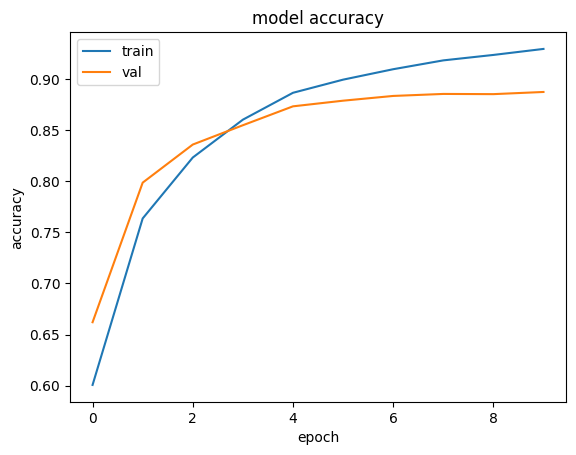

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Visualize embeddings in 2D
Check also the tensorflow [projector](http://projector.tensorflow.org/) use in this [example](https://www.tensorflow.org/tutorials/text/word_embeddings)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
embeddings = model.get_layer('embedding').get_weights()[0]

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)

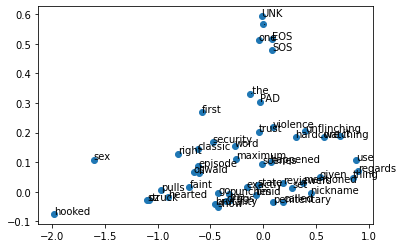

In [ ]:
words = list(word_2_index.keys())[:50]
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.scatter(result[:50, 0], result[:50, 1])